## Text Document Classification with Naive Bayes

In this project we will classify text documents using Naive Bayes classifers.  We will be working with the dataset called "20 Newsgroups", which is a collection of 20,000 newsgroup posts organized into 20 categories.

First we need to initialize Python.  Run the below cell.

In [47]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
from numpy import *
from sklearn import *
from scipy import stats
random.seed(100)

Next, put the file "20news-bydate.pkz' into the directory "~/scikit_learn_data" where "~" is your home directory.  This will locally cache the dataset rather than download it from the web.

Next, we will extract 4 classes from the dataset.  Run the below cell.

In [48]:
# strip away headers/footers/quotes from the text
removeset = ('headers', 'footers', 'quotes')

# only use 4 categories
cats      = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

# load the training and testing sets
newsgroups_train = datasets.fetch_20newsgroups(subset='train',
                           remove=removeset, categories=cats)
newsgroups_test  = datasets.fetch_20newsgroups(subset='test', 
                           remove=removeset, categories=cats)

Now, we check if we got all the data.  The training set should have 2034 documents, and the test set should have 1353 documents.

In [49]:
print "training set size: %d" % len(newsgroups_train.data)
print "testing set size:  %d" % len(newsgroups_test.data)
print newsgroups_train.target_names
print newsgroups_train.target.shape

training set size: 2034
testing set size:  1353
['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
(2034L,)


Now have a look at the documents.

In [50]:
for i in [0, 1, 2 ,3]:
    print "--- document %d (class=%s) ---" \
       % (i, newsgroups_train.target_names[newsgroups_train.target[i]])
    print newsgroups_train.data[i]

--- document 0 (class=comp.graphics) ---
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
--- document 1 (class=talk.religion.misc) ---


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil 

### 1. Build document vectors
Create the vocabulary from the training data.  Then build the document vectors for the training and testing sets.  You can decide how many words you want in the vocabulary.

In [51]:
### INSERT YOUR CODE HERE
cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=26000)

# create the vocabulary, and return the document vectors
# NOTE: we only use the training data!
trainX = cntvect.fit_transform(newsgroups_train.data)

trainY = newsgroups_train.target

# calculate vectors for the test data
testX  = cntvect.transform(newsgroups_test.data)

testY = newsgroups_test.target

# print the vocabulary
# - (key,value) pairs correspond to (word,vector index)
# print cntvect.vocabulary_


### 2. Bernoulli Naive Bayes 
Learn a Bernoulli Naive Bayes model from the training set.  What is the prediction accuracy on the test set?  Try different parameters (alpha, max_features, etc) to get the best performance.

In [52]:
### INSERT YOUR CODE HERE
# fit the NB Bernoulli model w/ smoothing (0.1)
bmodel = naive_bayes.BernoulliNB(alpha=0.1)
bmodel.fit(trainX, trainY)


BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True)

In [53]:
# prediction
predY = bmodel.predict(testX)
print "predictions: ", predY
print "actual:      ", testY

# calculate accuracy
acc = metrics.accuracy_score(testY, predY)
print acc

predictions:  [1 1 1 ..., 2 1 1]
actual:       [2 1 1 ..., 3 1 1]
0.69549150037


What are the most informative words for each category?  Run the below code.

Note: `model.coef_[i]` will index the scores for the i-th class

In [54]:
# get the word names
fnames = asarray(cntvect.get_feature_names())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(bmodel.coef_[i])[-10:]
    print "class " + c
    print fnames[tmp]

class alt.atheism
[u'time' u'know' u'does' u'god' u'like' u'say' u'just' u'think' u'people'
 u'don']
class comp.graphics
[u'just' u'don' u'program' u'need' u'does' u'use' u'like' u'know'
 u'graphics' u'thanks']
class sci.space
[u'earth' u'use' u'time' u'nasa' u'know' u'think' u'don' u'just' u'like'
 u'space']
class talk.religion.misc
[u'say' u'way' u'like' u'does' u'know' u'think' u'god' u'don' u'just'
 u'people']


### 3. Multinomial Naive Bayes model
Now learn a multinomial Naive Bayes model using the TF-IDF representation for the documents.  Again try different parameter values to improve the test accuracy.

In [55]:
### INSERT YOUR CODE HERE
# TF-IDF representation
# (For TF, pass use_idf=False)
tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True)

# setup the TF-IDF representation, and transform the training set
trainXtf = tf_trans.fit_transform(trainX)

# transform the test set
testXtf = tf_trans.transform(testX)

mmodel_tf = naive_bayes.MultinomialNB(alpha=0.1)
mmodel_tf.fit(trainXtf, trainY)


MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [56]:
# prediction
predY = mmodel_tf.predict(testXtf)
print "predictions: ", predY
print "actual:      ", testY

# calculate accuracy
accuracy = metrics.accuracy_score(testY, predY)
print accuracy

predictions:  [2 1 1 ..., 3 1 1]
actual:       [2 1 1 ..., 3 1 1]
0.790096082779


What are the most informative features for Multinomial model? Run the below code.

In [57]:
# get the word names
fnames = asarray(cntvect.get_feature_names())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(mmodel_tf.coef_[i])[-10:]
    print "class " + c
    print fnames[tmp]

class alt.atheism
[u'islam' u'does' u'religion' u'atheism' u'say' u'just' u'think' u'don'
 u'people' u'god']
class comp.graphics
[u'windows' u'does' u'looking' u'program' u'know' u'file' u'image' u'files'
 u'thanks' u'graphics']
class sci.space
[u'earth' u'think' u'shuttle' u'orbit' u'moon' u'just' u'launch' u'like'
 u'nasa' u'space']
class talk.religion.misc
[u'objective' u'think' u'just' u'bible' u'don' u'christians' u'christian'
 u'people' u'jesus' u'god']


How do the most informative words differ between the TF-IDF multinomial model and the Bernoulli model?

- The informative words in Tf-IDF multinomial model actually have a better sense of meaning and reliability for categorizing a new documnent. the informative words are mostly unique to the category. 
- On the other hand, the informative words from the Bernoulli model are mostly not unique to a given category and simple dictionary words like "doe's" , "like", "think" etc repeat in all three sections. Thus making clasiffication task less accurate.

Finally, look at a few of the misclassified documents. 

In [58]:
### INSERT YOUR CODE HERE ###
inds = where(predY != testY)
print inds
for i in inds[0]:
    print "---- true="+ str(newsgroups_test.target_names[testY[i]]) + ", pred=" + str(newsgroups_test.target_names[predY[i]])
    print newsgroups_test.data[i]



(array([  17,   22,   23,   24,   30,   37,   42,   47,   52,   61,   62,
         76,   77,   78,   82,   86,   89,   90,   97,  101,  105,  106,
        110,  119,  122,  123,  124,  126,  131,  136,  141,  149,  150,
        154,  160,  166,  167,  171,  172,  173,  175,  177,  179,  181,
        182,  184,  185,  197,  203,  204,  207,  209,  211,  215,  218,
        220,  223,  227,  236,  245,  246,  247,  250,  253,  257,  264,
        283,  287,  288,  289,  291,  306,  307,  311,  312,  321,  330,
        333,  334,  337,  350,  355,  357,  364,  367,  368,  373,  374,
        384,  389,  399,  407,  415,  425,  427,  432,  440,  443,  447,
        450,  453,  455,  460,  461,  463,  465,  470,  471,  473,  484,
        492,  499,  501,  512,  523,  530,  536,  537,  539,  545,  548,
        551,  557,  560,  561,  564,  574,  575,  578,  579,  594,  603,
        607,  608,  627,  643,  645,  649,  653,  655,  656,  665,  670,
        675,  682,  685,  697,  706,  720,  733,  

Can you get any intuition or reason why they were misclassified?


- The reason for the mis classification is due to the fact that alot of informative words are common in all categories. This big overlap in words is the main reason for misclassification

### 4. Effect of smoothing
The smoothing (regularization) parameter has a big effect on the performance.  Using the Multinomial TF-IDF models, make a plot of accuracy versus different values of alpha. For each alpha, you need to train a new model. Which alpha value yields the best result?

In [59]:
### INSERT YOUR CODE HERE
accList = []
alphaList = []

#Alpha Values = 0.001 to 1 at every 0.001 intervals
for i in range(0,1001):
    if(i!=0):
        alphaval = float(i)/1000
        mmodel_tf = naive_bayes.MultinomialNB(alpha=alphaval)
        mmodel_tf.fit(trainXtf, trainY)
        predY = mmodel_tf.predict(testXtf)
        # calculate accuracy
        acc = metrics.accuracy_score(testY, predY)
        accList.append(acc)
        alphaList.append(alphaval)

accList = array(accList)
alphaList = array(alphaList)
print accList.shape
print alphaList.shape

(1000L,)
(1000L,)


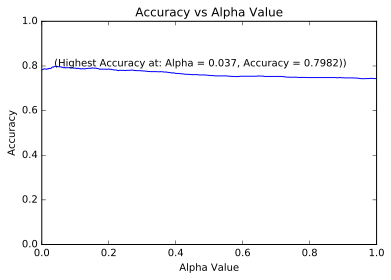

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(alphaList[:], accList[:])
plt.title("Accuracy vs Alpha Value")
plt.xlabel("Alpha Value")
plt.ylabel("Accuracy")
maxAcc = [0,0]
for x, y in zip(alphaList, accList):
    if y > maxAcc[1]:
        maxAcc[1] = y
        maxAcc[0] = x
#Print label for maximum accuracy
ax.annotate('(Highest Accuracy at: Alpha = %s, Accuracy = %0.4f))' % 
            (maxAcc[0], maxAcc[1]), xy=(maxAcc[0], maxAcc[1]), textcoords='data')
plt.axis([0, 1, 0, 1])
plt.show()


### 5. Effect of vocabulary size
The vocabulary size also affects the accuracy.  Make another plot of accuracy versus vocabulary size.  Which vocabulary size yields the best result?

In [62]:
### INSERT YOUR CODE HERE
accList = []
featureList = []
#All i from 100 to 13000 at 100 increment
for i in range(100, 26000, 500):
    cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=i)
    #Create Training sets
    trainX = cntvect.fit_transform(newsgroups_train.data)
    trainY = newsgroups_train.target
    #Create Test sets
    testX  = cntvect.transform(newsgroups_test.data)
    testY = newsgroups_test.target
    #Create TF-IDF
    tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True)
    # setup the TF-IDF representation, and transform the training set
    trainXtf = tf_trans.fit_transform(trainX)
    # transform the test set
    testXtf = tf_trans.transform(testX)
    #Train model
    mmodel_tf = naive_bayes.MultinomialNB(alpha=0.1)
    mmodel_tf.fit(trainXtf, trainY)
    predY = mmodel_tf.predict(testXtf)
    #Calculate accuracy
    acc = metrics.accuracy_score(testY, predY)
    accList.append(acc)
    featureList.append(i)

accList = array(accList)
featureList = array(featureList)
print accList.shape
print featureList.shape

(52L,)
(52L,)


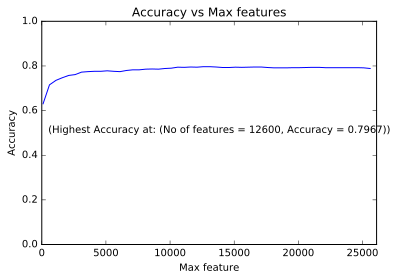

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(featureList[:], accList[:])
plt.title("Accuracy vs Max features")
plt.xlabel("Max feature")
plt.ylabel("Accuracy")
maxAcc = [0,0]
for x, y in zip(featureList, accList):
    if y > maxAcc[1]:
        maxAcc[1] = y
        maxAcc[0] = x
#Print label for maximum accuracy
ax.annotate('(Highest Accuracy at: (No of features = %s, Accuracy = %0.4f))' % 
            (maxAcc[0], maxAcc[1]), xy=(500, 0.5), textcoords='data')
plt.axis([0, 26100, 0, 1])
plt.show()
